In [180]:
import sqlite3 as sql
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
con = sql.connect("mental_health.sqlite")
cur = con.cursor()

In [182]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
cur.execute(query)
tables = cur.fetchall()

In [183]:
tables

[('Answer',), ('Question',), ('Survey',)]

In [184]:
columnDict = {}

for i,table in enumerate(tables):
    query = "SELECT * FROM %s;" % table
    cur.execute(query)
    cols = list(cur.description)
    valuelist = []
    for j, col in enumerate(cols):
        collist = list(col)
        valuelist.append(collist[0])
    columnDict[table] = valuelist

columnDict

{('Answer',): ['AnswerText', 'SurveyID', 'UserID', 'QuestionID'],
 ('Question',): ['questiontext', 'questionid'],
 ('Survey',): ['SurveyID', 'Description']}

In [185]:
query = "SELECT SurveyID, Description from Survey"
cur.execute(query)
cur.fetchall()

[(2014, 'mental health survey for 2014'),
 (2016, 'mental health survey for 2016'),
 (2017, 'mental health survey for 2017'),
 (2018, 'mental health survey for 2018'),
 (2019, 'mental health survey for 2019')]

In [186]:
query = "SELECT questiontext from Question"
cur.execute(query)
cur.fetchall()

[('What is your age?',),
 ('What is your gender?',),
 ('What country do you live in?',),
 ('If you live in the United States, which state or territory do you live in?',),
 ('Are you self-employed?',),
 ('Do you have a family history of mental illness?',),
 ('Have you ever sought treatment for a mental health disorder from a mental health professional?',),
 ('How many employees does your company or organization have?',),
 ('Is your employer primarily a tech company/organization?',),
 ('Does your employer provide mental health benefits as part of healthcare coverage?',),
 ('Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',),
 ('Would you bring up a mental health issue with a potential employer in an interview?',),
 ('Is your primary role within your company related to tech/IT?',),
 ('Do you know the options for mental health care available under your employer-provided health coverage?',),
 ('Ha

A few choices for the questions to look at:

* 'What is your age?'
* 'What is your gender?'
* 'What is your race?'
* 'What country do you live in?'
* 'Is your employer primarily a tech company/organization?'
* 'Are you self-employed?'
* 'How many employees does your company or organization have?'
* 'Do you have a family history of mental illness?'
* 'Have you ever sought treatment for a mental health disorder from a mental health professional?'
* 'Do you currently have a mental health disorder?'
* 'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?'
* 'Are you openly identified at work as a person with a mental health issue?'
* 'Has being identified as a person with a mental health issue affected your career?'
* 'How has it affected your career?'
* 'Does your employer provide mental health benefits as part of healthcare coverage?'
* 'Do you believe your productivity is ever affected by a mental health issue?'
* 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?'
* 'Would you feel comfortable discussing a mental health issue with your coworkers?'
* 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?'

These questions are broadly divided into three categories: general demographics, job questions, and mental health disorder questions. The point is to see if country lived in,gender, age etc has an effect on comfort with sharing mental health issues or going to get help or diagnosed. 

Another dimension of analysis is an overview of the state of mental health awareness and discussion in the industry. Looking at factors like size of company, self-employment, and whether mental healthcare is covered by the company's insurance are certain questions I want to look at. 

The last portion are mental health questions, looking at the background of the employee's mental health, and their comfort with sharing their mental health. Looking at how mental health may affect their jobs. 

Overall, this is a broad analysis trying to figure out what should be looked at in more detail.


In [187]:
query = """SELECT Q.questiontext as Ques,
A.answertext as Ans,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Ques IN ('What is your age?')
"""
cur.execute(query)
cur.fetchall()

[('What is your age?', '-1', 391),
 ('What is your age?', '-1', 716),
 ('What is your age?', '-1', 1128),
 ('What is your age?', '-1', 3447),
 ('What is your age?', '-1', 3449),
 ('What is your age?', '-29', 144),
 ('What is your age?', '0', 3981),
 ('What is your age?', '11', 1091),
 ('What is your age?', '15', 2069),
 ('What is your age?', '17', 1354),
 ('What is your age?', '18', 44),
 ('What is your age?', '18', 94),
 ('What is your age?', '18', 119),
 ('What is your age?', '18', 283),
 ('What is your age?', '18', 288),
 ('What is your age?', '18', 479),
 ('What is your age?', '18', 483),
 ('What is your age?', '18', 2715),
 ('What is your age?', '18', 2803),
 ('What is your age?', '19', 76),
 ('What is your age?', '19', 130),
 ('What is your age?', '19', 151),
 ('What is your age?', '19', 593),
 ('What is your age?', '19', 683),
 ('What is your age?', '19', 750),
 ('What is your age?', '19', 992),
 ('What is your age?', '19', 1021),
 ('What is your age?', '19', 1028),
 ('What is y

In [188]:
query = """SELECT Q.questiontext as Ques,
AVG(A.answertext) as Ans,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Ques IN ('What is your age?') AND A.answertext > 0
"""
cur.execute(query)
cur.fetchall()

[('What is your age?', 33.97981477083828, 1091)]

We see a few of the answers were nonsense so the conditiion that the original responses needed to be positiive. I am assuming the eleven and fifteen year old are legitimate responses because I cannot investigate it. 

Regardless, the result shows that the age skews young. 

With that out of the way, the next step will be to gather a bunch of demographic data with a SQL Query then put them into a dataframe to analyze the overall makeup of the group surveyed. This will roughly correspond to the first 15 questions, or until the "Do you currently have a mental health disorder?" question.


In [189]:
query = """SELECT A.UserID as User,
A.answertext as Age
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('What is your age?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.read_sql_query(query, con)

In [190]:
query = """SELECT A.answertext as Gender,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('What is your gender?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [191]:
query = """SELECT A.answertext as Race,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('What is your race?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [192]:
query = """SELECT A.answertext as Country,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('What country do you live in?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [193]:
query = """SELECT A.answertext as TechCompany,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Is your employer primarily a tech company/organization?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [194]:
query = """SELECT A.answertext as SelfEmployed,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Are you self-employed?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [195]:
query = """SELECT A.answertext as EmployeeCount,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('How many employees does your company or organization have?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [196]:
query = """SELECT A.answertext as FamilyHistory,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Do you have a family history of mental illness?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [197]:
query = """SELECT A.answertext as SoughtTreatment,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Have you ever sought treatment for a mental health disorder from a mental health professional?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [198]:
query = """SELECT A.answertext as CurrentMentalDisorder,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Do you currently have a mental health disorder?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [199]:
DemographicsDF.head()

,User,Age,Gender,Race,Country,TechCompany,SelfEmployed,EmployeeCount,FamilyHistory,SoughtTreatment,CurrentMentalDisorder
0,3447,-1,-1,-1,-1,-1,1,-1,Yes,1,Yes
1,3449,-1,-1,-1,-1,-1,1,-1,Yes,1,Yes
2,3981,0,male,White,United States of America,0,0,500-1000,No,0,No
3,2715,18,Male,-1,United Kingdom,0,0,100-500,Yes,1,Possibly
4,2803,18,male/androgynous,-1,Canada,-1,1,-1,I don't know,0,Possibly


In [200]:
DemographicsDF['Gender'].value_counts()

Gender
Male                            782
Female                          331
male                            212
female                          110
-1                               21
Nonbinary                         6
None                              3
Non-binary                        3
Genderqueer                       2
Genderfluid                       2
Trans man                         2
agender                           2
Non binary                        2
SWM                               1
Male (or female, or both)         1
Non-binary and gender fluid       1
Female/gender non-binary.         1
Female-identified                 1
Contextual                        1
Trans non-binary/genderfluid      1
none                              1
nonbinary                         1
She/her/they/them                 1
rr                                1
Demiguy                           1
I am a Wookie                     1
Genderqueer demigirl              1
Female-ish           

In [201]:
DemographicsDF['Race'].value_counts()

Race
White                               873
-1                                  537
More than one of the above           35
Asian                                31
I prefer not to answer               29
Black or African American            15
American Indian or Alaska Native      1
White Hispanic                        1
Hispanic                              1
Caucasian                             1
European American                     1
Name: count, dtype: int64

In [202]:
DemographicsDF['Country'].value_counts()

Country
United States of America    1013
United Kingdom               117
Canada                        49
Germany                       33
India                         31
Netherlands                   23
France                        22
Portugal                      21
Brazil                        21
Spain                         21
Australia                     16
Switzerland                   11
Poland                        10
Ireland                        9
Norway                         8
Italy                          7
New Zealand                    7
Mexico                         7
South Africa                   6
Belgium                        6
Japan                          6
Turkey                         5
Pakistan                       4
Greece                         4
Russia                         4
Romania                        4
Austria                        3
Sweden                         3
Indonesia                      3
Argentina                      3
Se

In [203]:
DemographicsDF['TechCompany'].value_counts()

TechCompany
1     974
0     334
-1    217
Name: count, dtype: int64

In [204]:
DemographicsDF['SelfEmployed'].value_counts()

SelfEmployed
0    1308
1     217
Name: count, dtype: int64

In [205]:
DemographicsDF['EmployeeCount'].value_counts()

EmployeeCount
More than 1000    374
100-500           364
26-100            243
-1                217
6-25              189
500-1000          106
1-5                32
Name: count, dtype: int64

In [206]:
DemographicsDF['SoughtTreatment'].value_counts()

SoughtTreatment
1    936
0    589
Name: count, dtype: int64

In [207]:
DemographicsDF['CurrentMentalDisorder'].value_counts()

CurrentMentalDisorder
Yes           662
No            438
Possibly      301
Don't Know    124
Name: count, dtype: int64

In [208]:
DemographicsDF['FamilyHistory'].value_counts()

FamilyHistory
Yes             706
No              445
I don't know    374
Name: count, dtype: int64

In [209]:
DemographicsDF.dtypes

User                      int64
Age                      object
Gender                   object
Race                     object
Country                  object
TechCompany              object
SelfEmployed             object
EmployeeCount            object
FamilyHistory            object
SoughtTreatment          object
CurrentMentalDisorder    object
dtype: object

Based on the snippet seen of the dataframe, *Age*, *TechCompany*, *Self-Employed*, and *Sought Treatment* could be converted into integers and the data should still make sense. Theoretically other categories could also be converted into integers as well. For example, *Family History* and *Current Mental Disorder* could be converted into integers, though it would be best to make *Current Mental Disroder* one-hot encoded which would complicate the data set.

There are also a handful of observations, such as the fact that the same number of people didn't answer the employee count question as reported that they were self-employed, which makes sense. That same number, 217, also corresponds to the amount of that did not answer if their company was a tech company. I believe these are all the same group of people, but diving into the data should confirm or debunk this idea.

In [210]:
DemographicsDF['Age'] = pd.to_numeric(DemographicsDF['Age'])
DemographicsDF['TechCompany'] = pd.to_numeric(DemographicsDF['TechCompany'])
DemographicsDF['SelfEmployed'] = pd.to_numeric(DemographicsDF['SelfEmployed'])
DemographicsDF['SoughtTreatment'] = pd.to_numeric(DemographicsDF['SoughtTreatment'])

In [211]:
DemographicsDF["FamilyHistory"] = DemographicsDF["FamilyHistory"].replace(to_replace='Yes',value=1)
DemographicsDF["FamilyHistory"] = DemographicsDF["FamilyHistory"].replace(to_replace='No',value=-1,)
DemographicsDF["FamilyHistory"] = DemographicsDF["FamilyHistory"].replace(to_replace='I don\'t know',value=0)

C:\Users\Shmar\AppData\Local\Temp\ipykernel_26124\2612738419.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DemographicsDF["FamilyHistory"] = DemographicsDF["FamilyHistory"].replace(to_replace='I don\'t know',value=0)


In [212]:
DemographicsDF.dtypes

User                      int64
Age                       int64
Gender                   object
Race                     object
Country                  object
TechCompany               int64
SelfEmployed              int64
EmployeeCount            object
FamilyHistory             int64
SoughtTreatment           int64
CurrentMentalDisorder    object
dtype: object

In [213]:
DemographicsDF.describe()

,User,Age,TechCompany,SelfEmployed,FamilyHistory,SoughtTreatment
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,3456.000000,35.038033,0.496393,0.142295,0.171148,0.613770
std,440.373894,8.530622,0.731388,0.349467,0.852020,0.487044
min,2694.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000
25%,3075.000000,29.000000,0.000000,0.000000,-1.000000,0.000000
50%,3456.000000,34.000000,1.000000,0.000000,0.000000,1.000000
75%,3837.000000,40.000000,1.000000,0.000000,1.000000,1.000000
max,4218.000000,67.000000,1.000000,1.000000,1.000000,1.000000


I noticed that there is a lot of consolidation that can be done to this particular data. An easy choice is to force everything into lowercase for categories like Gender, and do a bit of consolidation overall.

In [214]:
DemographicsDF['Gender'] = DemographicsDF['Gender'].str.lower()

In [215]:
DemographicsDF['Gender'].value_counts()

Gender
male                            995
female                          441
-1                               21
nonbinary                         7
none                              4
non-binary                        4
genderfluid                       3
agender                           3
non binary                        3
genderqueer                       2
trans man                         2
trans woman                       2
gender non-conforming woman       1
demiguy                           1
nonbinary/femme                   1
non-binary and gender fluid       1
female/gender non-binary.         1
female-identified                 1
contextual                        1
she/her/they/them                 1
male (or female, or both)         1
genderqueer demigirl              1
god king of the valajar           1
female-ish                        1
transfeminine                     1
swm                               1
i am a wookie                     1
43                   

In [216]:
DemographicsDF['Race'] = DemographicsDF['Race'].replace(to_replace='-1',value='I prefer not to answer')
DemographicsDF['Race'] = DemographicsDF['Race'].replace(to_replace='White Hispanic',value='Hispanic')
DemographicsDF['Race'] = DemographicsDF['Race'].replace(to_replace='Caucasian',value='White')
DemographicsDF['Race'] = DemographicsDF['Race'].replace(to_replace='European American',value='White')
DemographicsDF['Race'] = DemographicsDF['Race'].replace(to_replace='Black or African American',value='Other')
DemographicsDF['Race'] = DemographicsDF['Race'].replace(to_replace='American Indian or Alaska Native',value='Other')
DemographicsDF['Race'] = DemographicsDF['Race'].replace(to_replace='Hispanic',value='Other')


<Axes: ylabel='count'>

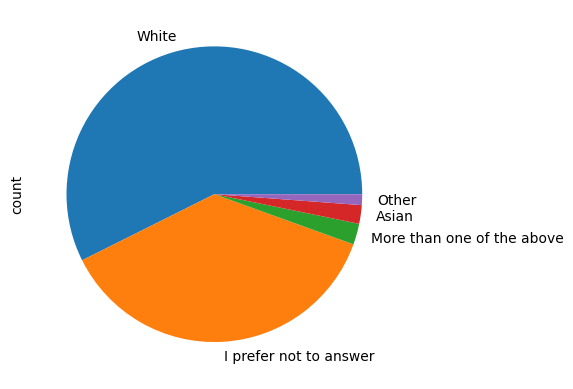

In [217]:
DemographicsDF['Race'].value_counts().plot(kind='pie')

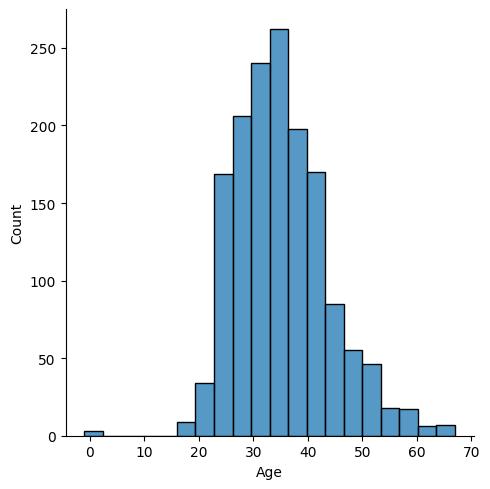

In [218]:
sns.displot(DemographicsDF, x='Age', bins=20)

<Axes: xlabel='EmployeeCount'>

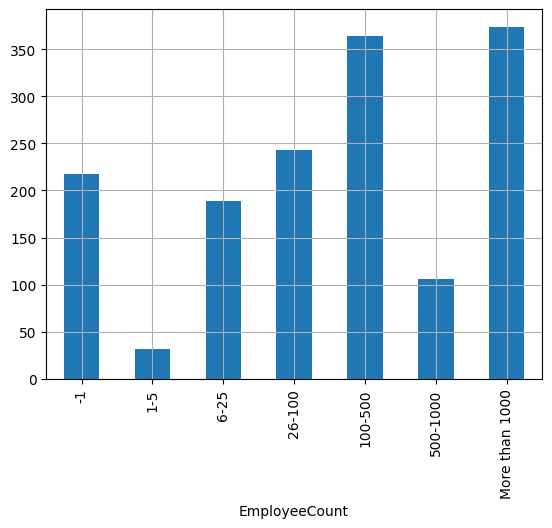

In [219]:
DemographicsDF['EmployeeCount'].value_counts().loc[['-1','1-5','6-25','26-100','100-500','500-1000','More than 1000']].plot.bar(grid=True)

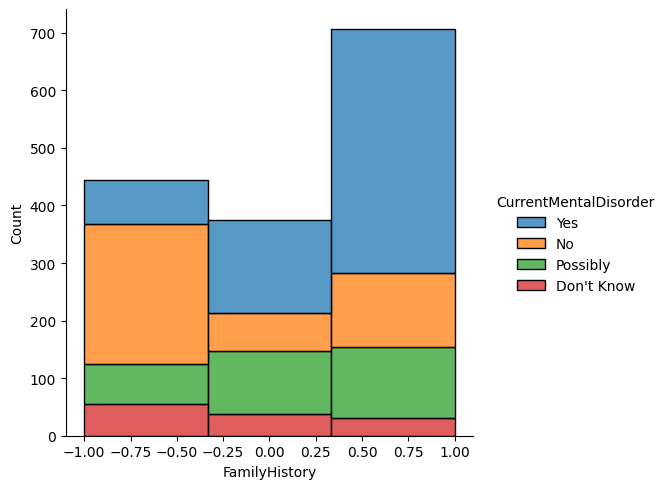

In [220]:
sns.displot(DemographicsDF, x="FamilyHistory", hue="CurrentMentalDisorder", multiple="stack", bins=3)

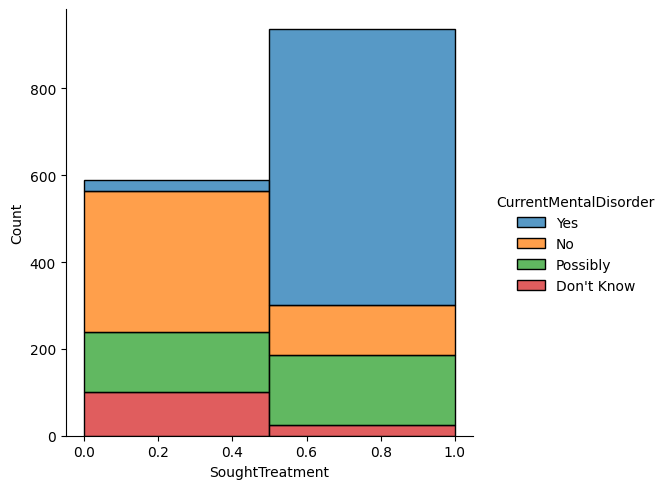

In [221]:
sns.displot(DemographicsDF, x="SoughtTreatment", hue="CurrentMentalDisorder", multiple="stack", bins=2)

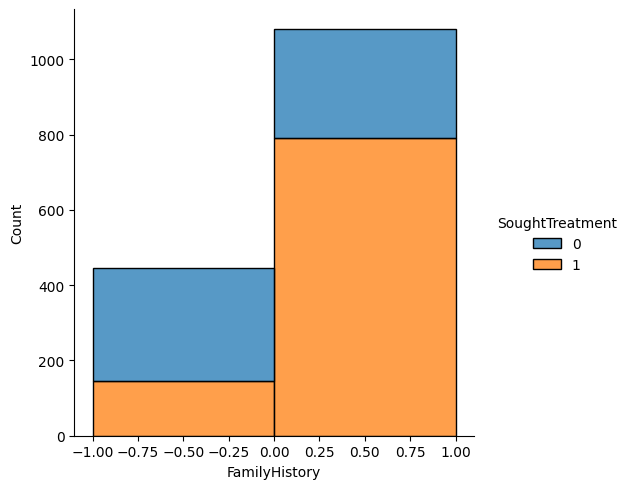

In [222]:
sns.displot(DemographicsDF, x="FamilyHistory", hue="SoughtTreatment", multiple="stack", bins=2)

We see a relationship between Family History and currently having a mental disorder. We also see that a large portion of the surveyed population has a family history of mental illness.

Additionally, we see a similar connection between seeking treatment and having a mental illness, which makes sense.

In [223]:
DemographicsDF[DemographicsDF['SelfEmployed'] == 1]['EmployeeCount'].value_counts()

EmployeeCount
-1    217
Name: count, dtype: int64

In [224]:
DemographicsDF[DemographicsDF['SelfEmployed'] == 1]['TechCompany'].value_counts()

TechCompany
-1    217
Name: count, dtype: int64

After swapping the data types, I called the describe method to get an overview of the data alongside a few graphs to analzye the frequency of certain variables. The histogram and describe methods shows the data skews young with the mean being around 35. The businesses that people work at skew towards larger with more than a thousand and 100-500 being the two most common employee counts, though there are a decent amount of people who are self-employed or work for a company with 100 or fewer employees.

Additionally, I did figure out that all of the self-employed people also did not answer the tech company question nor did they answer the employee count question.

The next step will be to add the new questions to the dataframe and then analyze that using a basic correlation matrix and a few key graphs.

In [225]:
query = """SELECT A.answertext as WorkInterferenceWithTreatment,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [226]:
query = """SELECT A.answertext as OpenIdentification,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Are you openly identified at work as a person with a mental health issue?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [227]:
query = """SELECT A.answertext as OpenIDAffectCareer,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Has being identified as a person with a mental health issue affected your career?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")


In [228]:
query = """SELECT A.answertext as HowAffectCareer,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('How has it affected your career?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [229]:
query = """SELECT A.answertext as EmployerProvidesMentalHC,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Does your employer provide mental health benefits as part of healthcare coverage?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [230]:
query = """SELECT A.answertext as ProductivityAffected,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Do you believe your productivity is ever affected by a mental health issue?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [231]:
query = """SELECT A.answertext as RevealDiagnosis,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [232]:
query = """SELECT A.answertext as ComfortCoworkers,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Would you feel comfortable discussing a mental health issue with your coworkers?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [233]:
query = """SELECT A.answertext as ComfortSupervisors,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [234]:
DemographicsDF.head()

,User,Age,Gender,Race,Country,TechCompany,SelfEmployed,EmployeeCount,FamilyHistory,SoughtTreatment,CurrentMentalDisorder,WorkInterferenceWithTreatment,OpenIdentification,OpenIDAffectCareer,HowAffectCareer,EmployerProvidesMentalHC,ProductivityAffected,RevealDiagnosis,ComfortCoworkers,ComfortSupervisors
0,3447,-1,-1,I prefer not to answer,-1,-1,1,-1,1,1,Yes,Rarely,-1,-1,-1,-1,No,"No, because it doesn't matter",-1,-1
1,3449,-1,-1,I prefer not to answer,-1,-1,1,-1,1,1,Yes,Sometimes,-1,-1,-1,-1,Yes,"Sometimes, if it comes up",-1,-1
2,3981,0,male,White,United States of America,0,0,500-1000,-1,0,No,Not applicable to me,0,-1,-1,I don't know,-1,-1,Maybe,Yes
3,2715,18,male,I prefer not to answer,United Kingdom,0,0,100-500,1,1,Possibly,Never,0,-1,-1,Not eligible for coverage / NA,-1,-1,Yes,Yes
4,2803,18,male/androgynous,I prefer not to answer,Canada,-1,1,-1,0,0,Possibly,Not applicable to me,0,-1,-1,-1,Unsure,Not applicable to me,-1,-1


In [235]:
DemographicsDF.dtypes

User                              int64
Age                               int64
Gender                           object
Race                             object
Country                          object
TechCompany                       int64
SelfEmployed                      int64
EmployeeCount                    object
FamilyHistory                     int64
SoughtTreatment                   int64
CurrentMentalDisorder            object
WorkInterferenceWithTreatment    object
OpenIdentification               object
OpenIDAffectCareer               object
HowAffectCareer                  object
EmployerProvidesMentalHC         object
ProductivityAffected             object
RevealDiagnosis                  object
ComfortCoworkers                 object
ComfortSupervisors               object
dtype: object

With all of the questions in a single dataframe, a heatmap and a few other graphs can be created to analyze any correlations and possible connections between variables. This may lead to future questions which may require more data from the database.

The overall plan is to look at a correlation matrix that looks at correlations generally. After this I will make histograms and stacked bar graphs to analyze the distribution of certain variables and note any correlations noticed as was done for Family History and Treatment Sought, for example.

A good idea would also be to encode a few columns to be -1,0, and 1, similar to what I did to Family History.

It is also good to state that there really is not too much variety in race and gender so getting any meaningful relations based on that will likely be fruitless.

In [236]:
DemographicsDF['OpenIdentification'].value_counts()

OpenIdentification
0     1340
1      183
-1       2
Name: count, dtype: int64

In [237]:
DemographicsDF['OpenIDAffectCareer'].value_counts()

OpenIDAffectCareer
-1    1345
0      119
1       61
Name: count, dtype: int64

In [238]:
DemographicsDF['OpenIdentification'] = pd.to_numeric(DemographicsDF['OpenIdentification'])
DemographicsDF['OpenIDAffectCareer'] = pd.to_numeric(DemographicsDF['OpenIDAffectCareer'])

In [239]:
AnswerDict = {'-1':'0','No':'-1','Yes':'1','Possibly':'0','Unsure':'0','Maybe':'0', 'Not applicable to me':0}
colList = ['OpenIdentification','OpenIDAffectCareer','ProductivityAffected','ComfortCoworkers','ComfortSupervisors']

for column in colList:
    for key in AnswerDict.keys():
        DemographicsDF[column] = DemographicsDF[column].replace(to_replace=key,value=AnswerDict[key])
    DemographicsDF[column] = pd.to_numeric(DemographicsDF[column])

In [240]:
DemographicsDF.head()

,User,Age,Gender,Race,Country,TechCompany,SelfEmployed,EmployeeCount,FamilyHistory,SoughtTreatment,CurrentMentalDisorder,WorkInterferenceWithTreatment,OpenIdentification,OpenIDAffectCareer,HowAffectCareer,EmployerProvidesMentalHC,ProductivityAffected,RevealDiagnosis,ComfortCoworkers,ComfortSupervisors
0,3447,-1,-1,I prefer not to answer,-1,-1,1,-1,1,1,Yes,Rarely,-1,-1,-1,-1,-1,"No, because it doesn't matter",0,0
1,3449,-1,-1,I prefer not to answer,-1,-1,1,-1,1,1,Yes,Sometimes,-1,-1,-1,-1,1,"Sometimes, if it comes up",0,0
2,3981,0,male,White,United States of America,0,0,500-1000,-1,0,No,Not applicable to me,0,-1,-1,I don't know,0,-1,0,1
3,2715,18,male,I prefer not to answer,United Kingdom,0,0,100-500,1,1,Possibly,Never,0,-1,-1,Not eligible for coverage / NA,0,-1,1,1
4,2803,18,male/androgynous,I prefer not to answer,Canada,-1,1,-1,0,0,Possibly,Not applicable to me,0,-1,-1,-1,0,Not applicable to me,0,0


In [241]:
DemographicsDF.describe()

,User,Age,TechCompany,SelfEmployed,FamilyHistory,SoughtTreatment,OpenIdentification,OpenIDAffectCareer,ProductivityAffected,ComfortCoworkers,ComfortSupervisors
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,3456.000000,35.038033,0.496393,0.142295,0.171148,0.613770,0.118689,-0.841967,0.099016,0.052459,0.087213
std,440.373894,8.530622,0.731388,0.349467,0.852020,0.487044,0.327559,0.461734,0.324066,0.692007,0.752686
min,2694.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3075.000000,29.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
50%,3456.000000,34.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
75%,3837.000000,40.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,1.000000,1.000000
max,4218.000000,67.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The code for the diagonal correlation matrix was retrieved from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<Axes: >

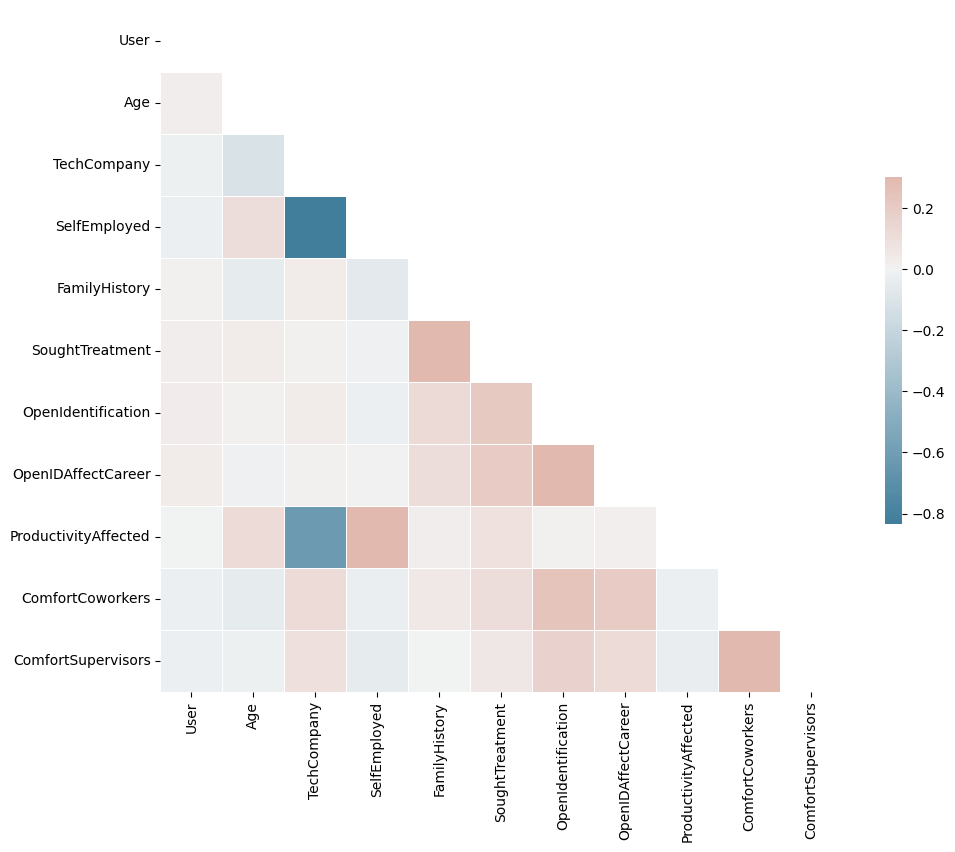

In [242]:
corrMatrix = DemographicsDF.corr(numeric_only=True)
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corrMatrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There are a handful of interesting correlations to take a look at. Felling your productivity was affected by mental illness is negatively correlated with tech company employment and postively correlated with self-employment. There are a handful of interesting juxtapositions for self-employment versus tech company employment. There is a strange opposing correlation for family history and a weaker one for seeking treatment. It does, however, make sense that Tech Company employees are more likely openly identify, and find comfort in talking with their coworkers and supervisors over the self-employed, since they tend to not have coworkers and supervisors. Open Identification not really affecting the participants' pereceived productivity is good, as is the fac t that it is correlated with comfort in sharing with coworkers and supervisors.

It seems that this would warrant taking a look at what mental health related services and awareness tech companies provide to see if that is correlated with productivity not being affected and if that is positively correlated with open identification and comfort discussing with coworkers and supervisors.

Some additional questions to add to the dataframe:

* 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'
* 'Do you know the options for mental health care available under your employer-provided health coverage?'
* 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'
* 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?'
* 'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?'
* 'Do you know local or online resources to seek help for a mental health issue?'
* 'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'

In [243]:
query = """SELECT A.answertext as Anonymity,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [244]:
query = """SELECT A.answertext as KnowMHCOpt,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Do you know the options for mental health care available under your employer-provided health coverage?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [245]:
query = """SELECT A.answertext as FormalEmployerDisc,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [246]:
query = """SELECT A.answertext as ResourcesOffered,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Does your employer offer resources to learn more about mental health disorders and options for seeking help?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [247]:
query = """SELECT A.answertext as MHCCovered,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [248]:
query = """SELECT A.answertext as KnowResources,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Do you know local or online resources to seek help for a mental health issue?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [249]:
query = """SELECT A.answertext as BadResponse,
A.UserID as User
FROM Question as Q
JOIN Answer as A
on Q.questionid = A.QuestionID
WHERE Q.questiontext IN ('Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?')
"""
cur.execute(query)
cur.fetchall()
DemographicsDF = pd.merge(DemographicsDF, pd.read_sql_query(query, con), on= "User")

In [250]:
DemographicsDF.head()

,User,Age,Gender,Race,Country,TechCompany,SelfEmployed,EmployeeCount,FamilyHistory,SoughtTreatment,...,RevealDiagnosis,ComfortCoworkers,ComfortSupervisors,Anonymity,KnowMHCOpt,FormalEmployerDisc,ResourcesOffered,MHCCovered,KnowResources,BadResponse
0,3447,-1,-1,I prefer not to answer,-1,-1,1,-1,1,1,...,"No, because it doesn't matter",0,0,-1,-1,-1,-1,1,I know some,-1
1,3449,-1,-1,I prefer not to answer,-1,-1,1,-1,1,1,...,"Sometimes, if it comes up",0,0,-1,-1,-1,-1,1,I know some,-1
2,3981,0,male,White,United States of America,0,0,500-1000,-1,0,...,-1,0,1,I don't know,No,Yes,I don't know,-1,-1,No
3,2715,18,male,I prefer not to answer,United Kingdom,0,0,100-500,1,1,...,-1,1,1,Yes,-1,Yes,Yes,-1,-1,No
4,2803,18,male/androgynous,I prefer not to answer,Canada,-1,1,-1,0,0,...,Not applicable to me,0,0,-1,-1,-1,-1,1,I know some,I've always been self-employed


In [251]:
DemographicsDF['Anonymity'].value_counts()

Anonymity
I don't know    804
Yes             440
-1              217
No               64
Name: count, dtype: int64

In [252]:
DemographicsDF['FormalEmployerDisc'].value_counts()

FormalEmployerDisc
No              813
Yes             369
-1              217
I don't know    126
Name: count, dtype: int64

In [253]:
DemographicsDF['ResourcesOffered'].value_counts()

ResourcesOffered
No              553
Yes             407
I don't know    348
-1              217
Name: count, dtype: int64

In [254]:
DemographicsDF['MHCCovered'].value_counts()

MHCCovered
-1    1308
1      152
0       65
Name: count, dtype: int64

In [255]:
DemographicsDF['KnowResources'].value_counts()

KnowResources
-1                      1308
I know some               80
Yes, I know several       70
No, I don't know any      67
Name: count, dtype: int64

In [256]:
DemographicsDF['BadResponse'].value_counts()

BadResponse
No                                640
Maybe/Not sure                    402
Yes, I observed                   277
Yes, I experienced                189
I've always been self-employed     15
-1                                  2
Name: count, dtype: int64

In [257]:
AnswerDict = {'-1':'0','No':'-1','Yes':'1','Possibly':'0','Unsure':'0','Maybe':'0', 'Not applicable to me':0, 'I don\'t know':0}
colList = ['Anonymity','KnowMHCOpt','FormalEmployerDisc','ResourcesOffered']

for column in colList:
    for key in AnswerDict.keys():
        DemographicsDF[column] = DemographicsDF[column].replace(to_replace=key,value=AnswerDict[key])
    DemographicsDF[column] = pd.to_numeric(DemographicsDF[column])

In [258]:
DemographicsDF.head()

,User,Age,Gender,Race,Country,TechCompany,SelfEmployed,EmployeeCount,FamilyHistory,SoughtTreatment,...,RevealDiagnosis,ComfortCoworkers,ComfortSupervisors,Anonymity,KnowMHCOpt,FormalEmployerDisc,ResourcesOffered,MHCCovered,KnowResources,BadResponse
0,3447,-1,-1,I prefer not to answer,-1,-1,1,-1,1,1,...,"No, because it doesn't matter",0,0,0,0,0,0,1,I know some,-1
1,3449,-1,-1,I prefer not to answer,-1,-1,1,-1,1,1,...,"Sometimes, if it comes up",0,0,0,0,0,0,1,I know some,-1
2,3981,0,male,White,United States of America,0,0,500-1000,-1,0,...,-1,0,1,0,-1,1,0,-1,-1,No
3,2715,18,male,I prefer not to answer,United Kingdom,0,0,100-500,1,1,...,-1,1,1,1,0,1,1,-1,-1,No
4,2803,18,male/androgynous,I prefer not to answer,Canada,-1,1,-1,0,0,...,Not applicable to me,0,0,0,0,0,0,1,I know some,I've always been self-employed


<Axes: >

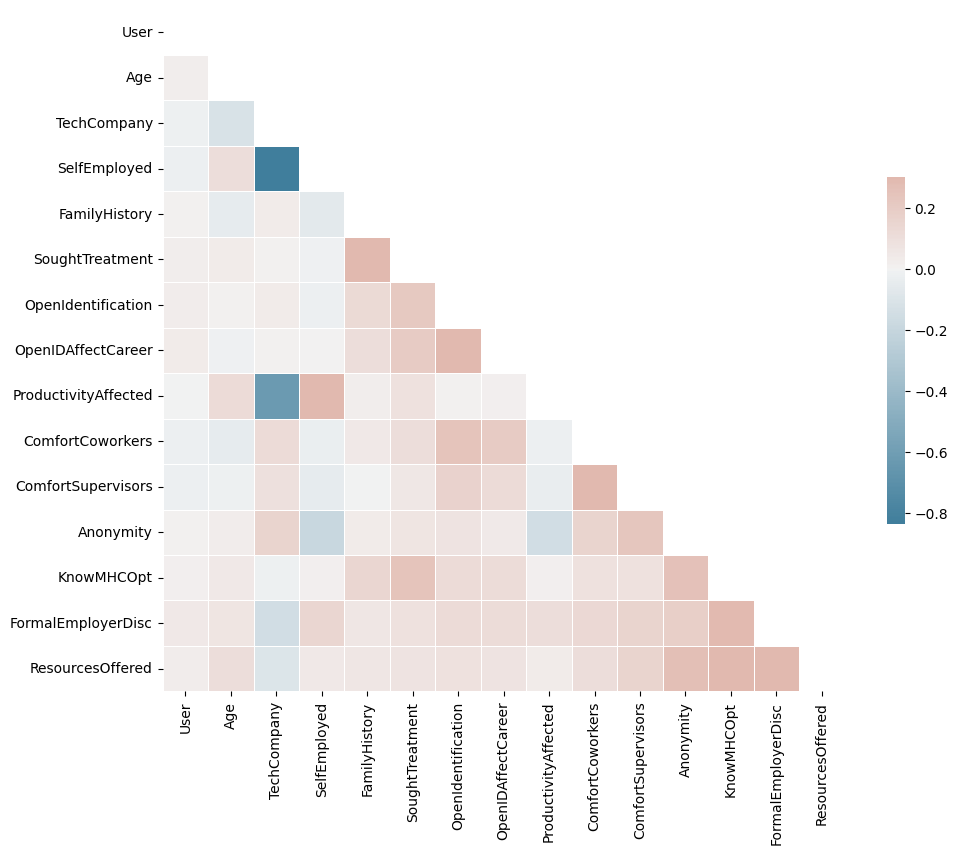

In [259]:
corrMatrix = DemographicsDF.corr(numeric_only=True)
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corrMatrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There is an interesting connection between feeling productivity is affected, and discomfort in sharing with coworkers and supervisors. There is also a correlation between anonymity not being protected and feeling producivity is affected. A bit more probing is required, but my hypothesis is that people feel ashamed that their productivity and do not feel comfortable talking with people about it.

There is also a shared correlation between the new questions asked, knowing your mental healthcare options correlates with a formal discussion about mental health by an employer and resources being offered. It is important to note that certain questions were not simplified into -1, 0, and 1 so those have to be looked at separately.

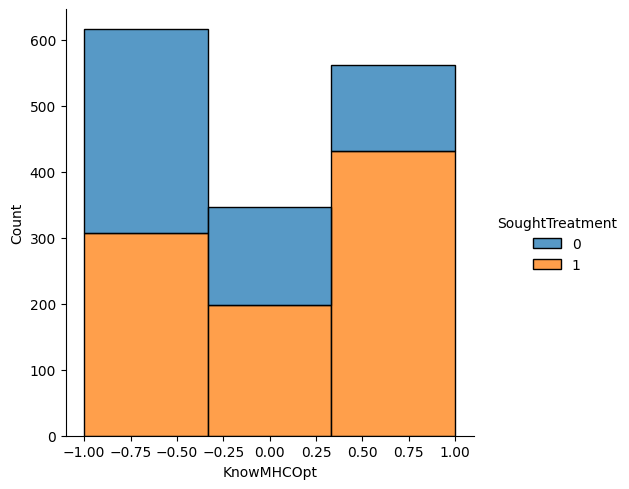

In [260]:
sns.displot(DemographicsDF, x="KnowMHCOpt", hue="SoughtTreatment", multiple="stack", bins=3)

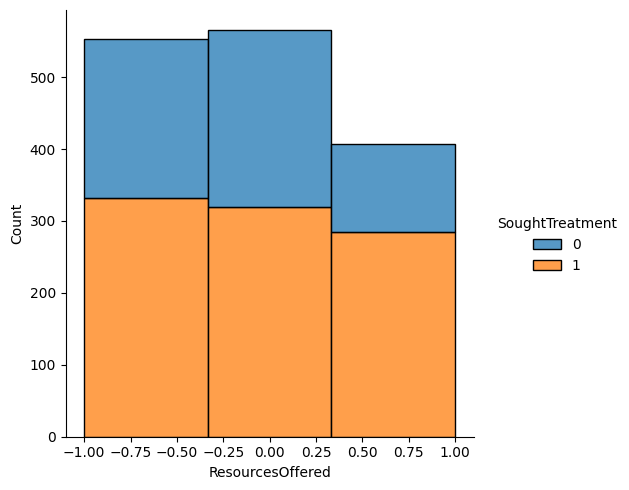

In [265]:
sns.displot(DemographicsDF, x="ResourcesOffered", hue="SoughtTreatment", multiple="stack", bins=3)

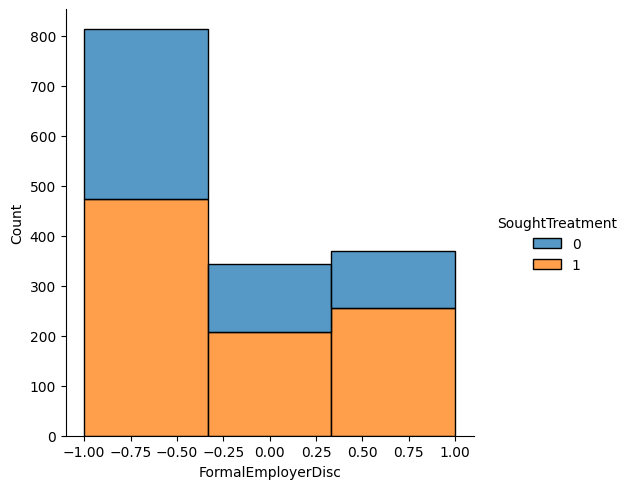

In [266]:
sns.displot(DemographicsDF, x="FormalEmployerDisc", hue="SoughtTreatment", multiple="stack", bins=3)

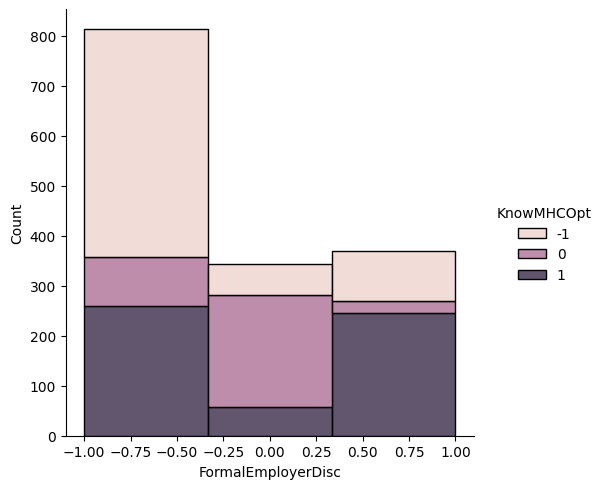

In [263]:
sns.displot(DemographicsDF, x="FormalEmployerDisc", hue="KnowMHCOpt", multiple="stack", bins=3)

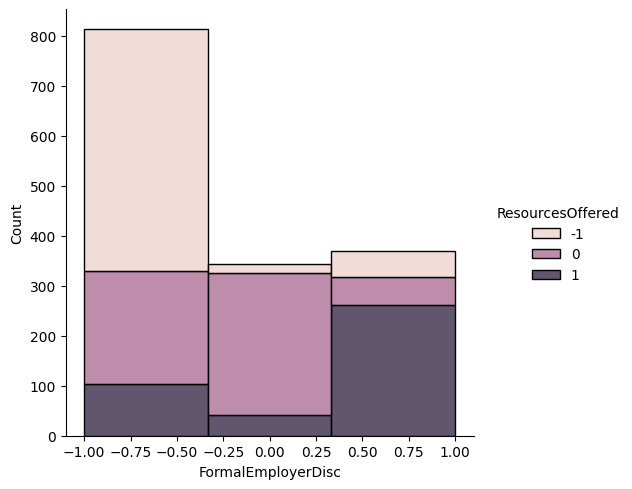

In [264]:
sns.displot(DemographicsDF, x="FormalEmployerDisc", hue="ResourcesOffered", multiple="stack", bins=3)

There definitely seems to be a correlation between seeking treatment, employers offering resources, the employer having a formal discussion about mental health, and knowing one's mental healthcare options. It's an interesting clustered relationship because it is almost fully in the hands of the employer. They are the ones offering resources, having the formal discussion, and oftentimes will be offering the healthcare plan to their employees. There seems to be many steps that employers can do to help people seek treatment, which is not the be-all and end-all for mental health stigma and problems, but it is a great first step.

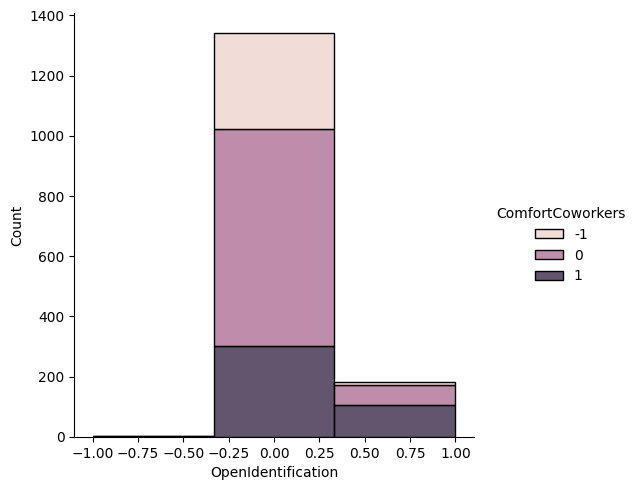

In [270]:
sns.displot(DemographicsDF, x="OpenIdentification", hue="ComfortCoworkers", multiple="stack", bins=3)

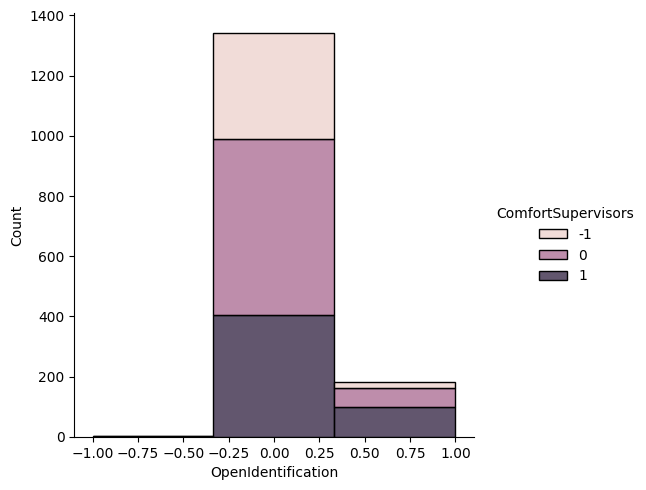

In [271]:
sns.displot(DemographicsDF, x="OpenIdentification", hue="ComfortSupervisors", multiple="stack", bins=3)

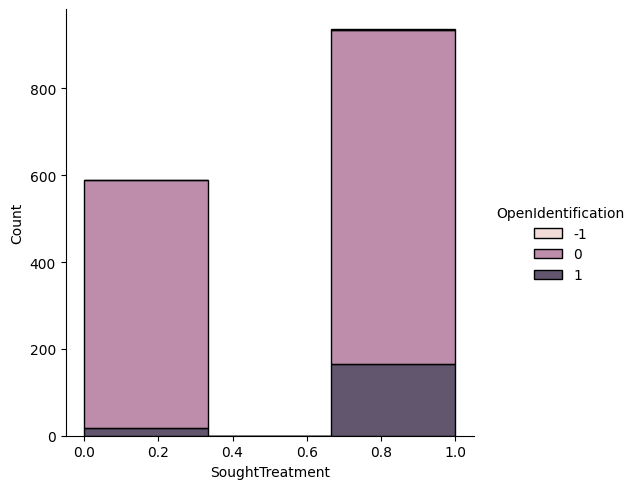

In [274]:
sns.displot(DemographicsDF, x="SoughtTreatment", hue="OpenIdentification", multiple="stack", bins=3)

In [272]:
DemographicsDF["OpenIdentification"].value_counts()

OpenIdentification
 0    1340
 1     183
-1       2
Name: count, dtype: int64

Open Identification seems to have few non-zero entries but it still seems to correlate Open Identification and Comfort in sharing. There is also a certain relationship between seeking treatment and opently identifying, which could reduce stigma.

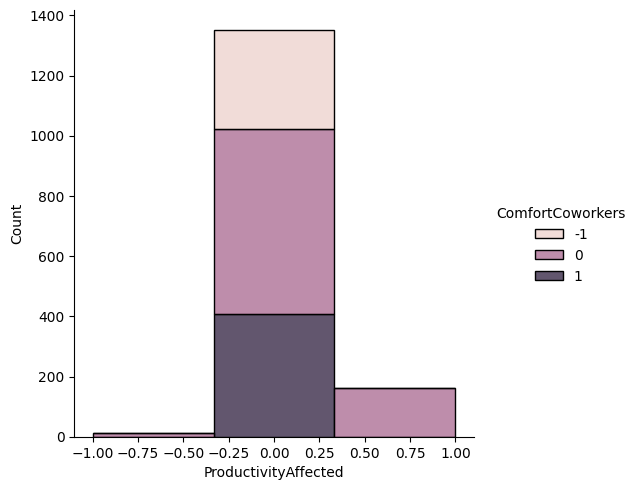

In [268]:
sns.displot(DemographicsDF, x="ProductivityAffected", hue="ComfortCoworkers", multiple="stack", bins=3)

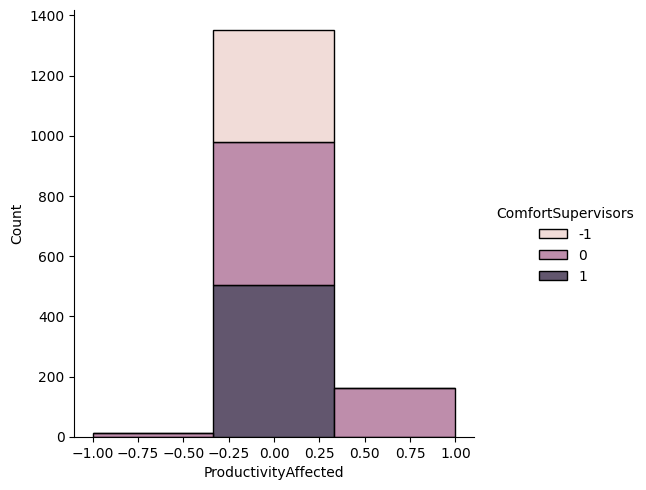

In [267]:
sns.displot(DemographicsDF, x="ProductivityAffected", hue="ComfortSupervisors", multiple="stack", bins=3)

In [269]:
DemographicsDF['ProductivityAffected'].value_counts()

ProductivityAffected
 0    1350
 1     163
-1      12
Name: count, dtype: int64

Productivity affected seems to be difficult to correlated with comfort sharing since most of the values are zero, which is a mixed response or non-response. This means the aforementioned correlation between producivity being affected and comfort sharing might have been spurious. 

In [275]:
DemographicsDF['BadResponse'].value_counts()

BadResponse
No                                640
Maybe/Not sure                    402
Yes, I observed                   277
Yes, I experienced                189
I've always been self-employed     15
-1                                  2
Name: count, dtype: int64

array([[<Axes: title={'center': 'OpenIdentification'}>,
        <Axes: title={'center': 'ComfortCoworkers'}>],
       [<Axes: title={'center': 'ComfortSupervisors'}>, <Axes: >]],
      dtype=object)

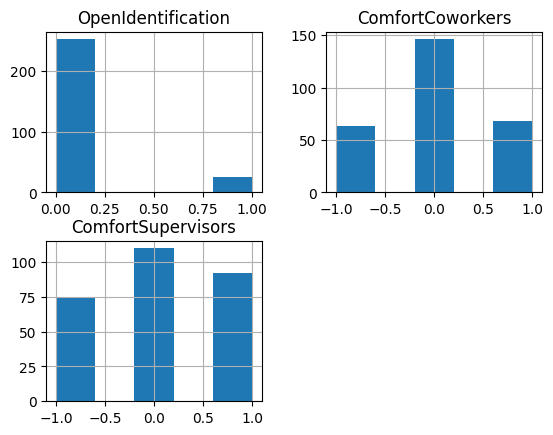

In [281]:
DemographicsDF[DemographicsDF['BadResponse']== 'Yes, I observed'].hist(column=['OpenIdentification','ComfortCoworkers','ComfortSupervisors'], bins=5)

array([[<Axes: title={'center': 'OpenIdentification'}>,
        <Axes: title={'center': 'ComfortCoworkers'}>],
       [<Axes: title={'center': 'ComfortSupervisors'}>, <Axes: >]],
      dtype=object)

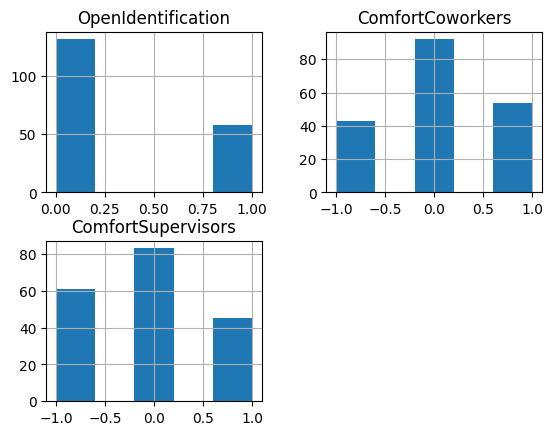

In [282]:
DemographicsDF[DemographicsDF['BadResponse']== 'Yes, I experienced'].hist(column=['OpenIdentification','ComfortCoworkers','ComfortSupervisors'], bins=5)

array([[<Axes: title={'center': 'OpenIdentification'}>,
        <Axes: title={'center': 'ComfortCoworkers'}>],
       [<Axes: title={'center': 'ComfortSupervisors'}>, <Axes: >]],
      dtype=object)

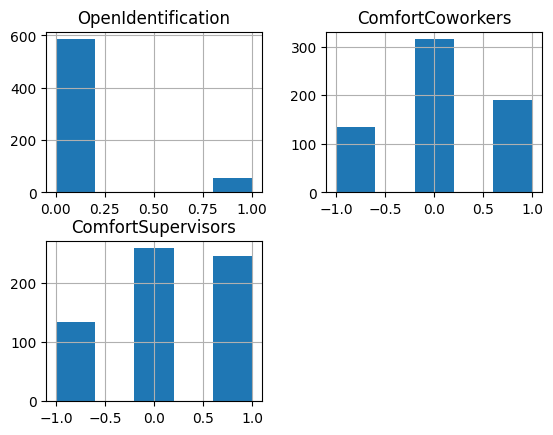

In [284]:
DemographicsDF[DemographicsDF['BadResponse']== 'No'].hist(column=['OpenIdentification','ComfortCoworkers','ComfortSupervisors'], bins=5)

array([[<Axes: title={'center': 'OpenIdentification'}>,
        <Axes: title={'center': 'ComfortCoworkers'}>],
       [<Axes: title={'center': 'ComfortSupervisors'}>, <Axes: >]],
      dtype=object)

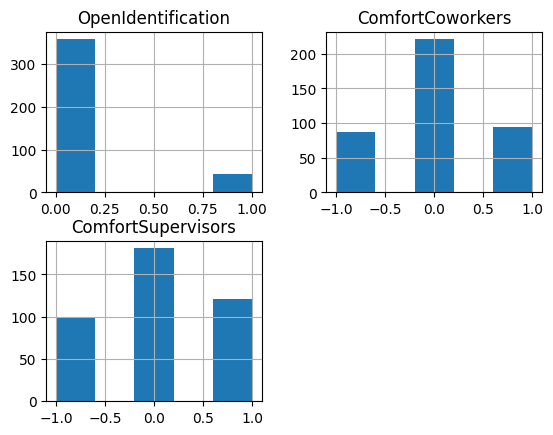

In [286]:
DemographicsDF[DemographicsDF['BadResponse']== 'Maybe/Not sure'].hist(column=['OpenIdentification','ComfortCoworkers','ComfortSupervisors'], bins=5)